<a href="https://colab.research.google.com/github/tseliang2000/MIR/blob/main/HW2_108000122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS573100 Music Information Retrieval

DDL: 2023.5.9.

Description: Homework 2. Intrument and pitch classification.

Requirements:
1. Name you file as HW2_{student-id}.ipynb and submit to eeclass.
2. Strongly recommend writing the report on your jupyter notebook file.

# question 1


1. 

Cb-ord-A2-ff-1c-R100d

Cb: contrabass

ord: "ordinario"

A2: pitch

ff: fortissimo

1c: in this case the label "1c", denotes the string which is being bowed

R100d:  "R" stands for "resampled"




# question 2


[Text(0.5, 1.0, 'MFCC')]

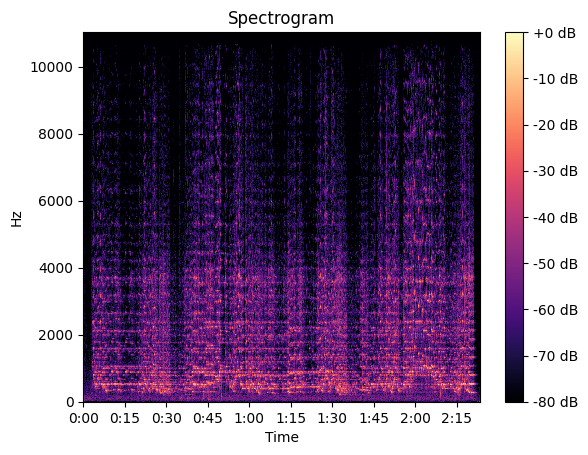

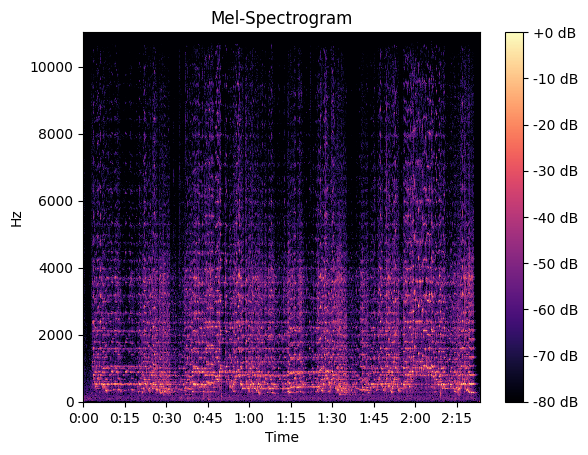

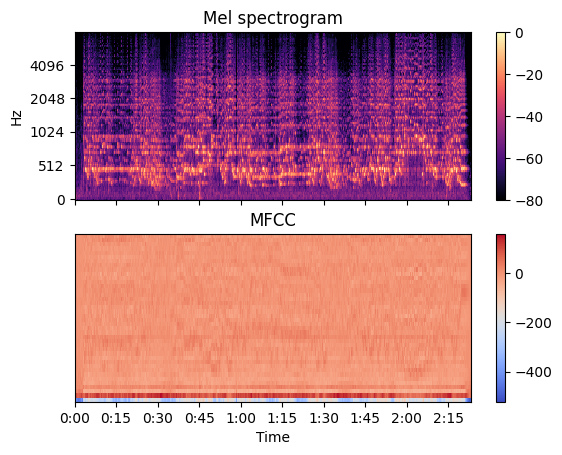

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Load audio file
filename = '1003bach.mp3'
y, sr = librosa.load(filename)

# Plot spectrogram
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

# Plot mel-spectrogram
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Mel-Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

# Plot MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')




1. Spectrograms are often used to visualize the frequency content of a signal and how it changes over time.

2. mel-spectrogram is a variation of the spectrogram that is transformed to better match human perception of sound, can be thought of as a more perceptually relevant version of the spectrogram.

3. MFCC are based on the idea that the human ear is more sensitive to changes in spectral shape than to changes in the amplitude of the spectrum. To compute MFCCs, the mel-spectrogram is first computed as described above. Then, a discrete cosine transform (DCT) is applied to the log mel-spectrogram to obtain a set of cepstral coefficients. 

most suitable for instrument and pitch classification: mel spectrogram and MFCC

# question 3

In [5]:
!pip install mirdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 109.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=d3d42154f907f2ff66875f4f75733c79979732908b6a4fd9d8573140a6d94efd
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64907 sha256=ac64a96753cdb174b99314ff3

In [6]:
!pip install librosa==0.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0.post2
    Uninstalling librosa-0.10.0.post2:
      Successfully uninstalled librosa-0.10.0.post2


In [7]:
import librosa
import tensorflow as tf


# Load TinySOL metadata
# Import mirdata library
import mirdata

# Initialize tinysol dat

tinysol_dataset = mirdata.initialize("tinysol")
tinysol_dataset.download()
# Load tinysol metadata
tinysol_metadata = tinysol_dataset._metadata




979MB [30:41, 558kB/s]                           
312kB [00:02, 148kB/s]                           


#Feature Extraction

In [8]:
import numpy as np
import librosa
# Create empty lists to store MFCC features and labels
mfccs_list = []
instrument_list = []
pitch_list = []

# Iterate through all the tracks in the dataset
for track_id in tinysol_dataset.track_ids:

  # Load a track by its ID
  track = tinysol_dataset.track(track_id)

  # Print some track information
  print("Track ID:", track.track_id)
  print("Instrument name:", track.instrument_full)
  print("Pitch class:", track.pitch)
  #print("Dynamics:", track.dynamics)

  # Load and play the audio file of the track
  audio, sr = track.audio
  #track.play_audio()

  # TODO:  IMPLEMENT FEATURE EXTRACTION
  mfccs = librosa.feature.mfcc(y = track.audio[0], sr = track.audio[1])
  feat = np.mean(mfccs, axis = 1)

  # Append the MFCC features and labels to the lists
  mfccs_list.append(feat)
  instrument_list.append(track.instrument_full)
  pitch_list.append(track.pitch)






Streaming output truncated to the last 5000 lines.
Instrument name: Cello
Pitch class: F2
Track ID: Vc-ord-F#2-mf-4c-N
Instrument name: Cello
Pitch class: F#2
Track ID: Vc-ord-G2-mf-3c-N
Instrument name: Cello
Pitch class: G2
Track ID: Vc-ord-G2-mf-4c-N
Instrument name: Cello
Pitch class: G2
Track ID: Vc-ord-G#2-mf-3c-N
Instrument name: Cello
Pitch class: G#2
Track ID: Vc-ord-G#2-mf-4c-N
Instrument name: Cello
Pitch class: G#2
Track ID: Vc-ord-A2-mf-3c-N
Instrument name: Cello
Pitch class: A2
Track ID: Vc-ord-A2-mf-4c-N
Instrument name: Cello
Pitch class: A2
Track ID: Vc-ord-A#2-mf-3c-T13u
Instrument name: Cello
Pitch class: A#2
Track ID: Vc-ord-A#2-mf-4c-N
Instrument name: Cello
Pitch class: A#2
Track ID: Vc-ord-B2-mf-3c-N
Instrument name: Cello
Pitch class: B2
Track ID: Vc-ord-B2-mf-4c-T20u
Instrument name: Cello
Pitch class: B2
Track ID: Vc-ord-C3-mf-3c-N
Instrument name: Cello
Pitch class: C3
Track ID: Vc-ord-C3-mf-4c-N
Instrument name: Cello
Pitch class: C3
Track ID: Vc-ord-C#3-mf

In [9]:
# Convert the lists to numpy arrays for tensorflow compatibility[^2^][2] [^3^][3]
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)

#Encode labels

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
instrument_array = le.fit_transform(instrument_array)
instr_classes = le.classes_
print(instr_classes)
pitch_array = le.fit_transform(pitch_array)
pitch_classes = le.classes_
print(pitch_classes)

['Accordion' 'Alto Saxophone' 'Bass Tuba' 'Bassoon' 'Cello'
 'Clarinet in Bb' 'Contrabass' 'Flute' 'French Horn' 'Oboe' 'Trombone'
 'Trumpet in C' 'Viola' 'Violin']
['A#1' 'A#2' 'A#3' 'A#4' 'A#5' 'A#6' 'A#7' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6'
 'A7' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C#2' 'C#3' 'C#4' 'C#5' 'C#6'
 'C#7' 'C#8' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'D#2' 'D#3' 'D#4' 'D#5'
 'D#6' 'D#7' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'F#1' 'F#2' 'F#3' 'F#4' 'F#5' 'F#6' 'F#7' 'F1' 'F2' 'F3' 'F4' 'F5'
 'F6' 'F7' 'G#1' 'G#2' 'G#3' 'G#4' 'G#5' 'G#6' 'G#7' 'G1' 'G2' 'G3' 'G4'
 'G5' 'G6' 'G7']


#Split Training Set and Testing Set 

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_instrument, y_test_instrument, y_train_pitch, y_test_pitch = train_test_split(
    mfccs_array, instrument_array, pitch_array,test_size=0.2, random_state=23) # DON'T Modify Random_state!


In [13]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

##Instrument Classification

# SVM Model

In [14]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# Create a model for Intstrument Classification
model = SVC(kernel='poly', C=1, gamma=0.1)

# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  model.fit(X_train_kfold, y_train_kfold_instrument)
  # TODO:　Evaluate your model  using the validation subset
  score= model.score(X_val_kfold,  y_val_kfold_instrument)
  print("Validation score:", score)
 
# TODO: Evaluate your model using the test set
test_score=model.score(X_test, y_test_instrument)
print("Test score:", test_score)

Validation score: 0.9588688946015425
Validation score: 0.9794344473007712
Validation score: 0.961340206185567
Validation score: 0.9561855670103093
Validation score: 0.9458762886597938
Validation score: 0.9587628865979382
Test score: 0.9639794168096055


Confusion matrix


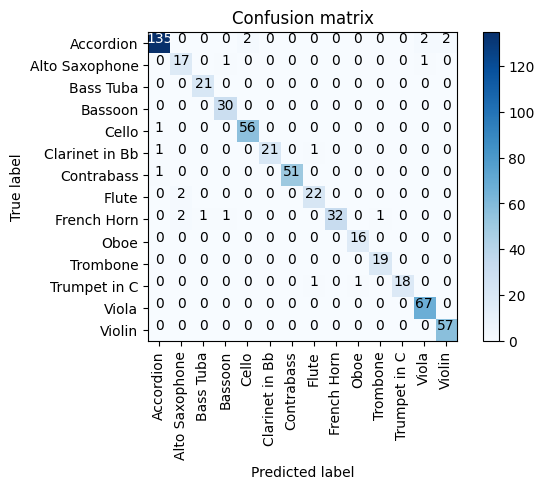

ACC =  0.964
precision =  0.964
recall =  0.964


In [15]:
y_pred_instr = model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

# Decision Tree Model

In [16]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# Create a model for Intstrument Classification
tree_model = DecisionTreeClassifier(max_depth=17, random_state=23) 

# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  tree_model.fit(X_train_kfold, y_train_kfold_instrument)
  # TODO:　Evaluate your model  using the validation subset
  score = tree_model.score(X_val_kfold, y_val_kfold_instrument)
  print("Validation score:", score)



Validation score: 0.7840616966580977
Validation score: 0.7892030848329049
Validation score: 0.7938144329896907
Validation score: 0.8350515463917526
Validation score: 0.8092783505154639
Validation score: 0.7345360824742269


Confusion matrix


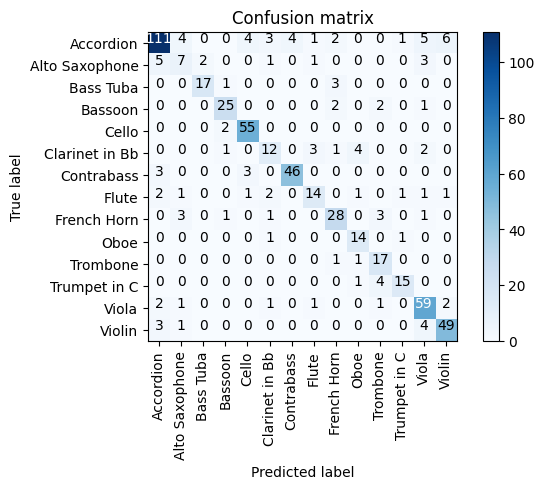

ACC =  0.804
precision =  0.804
recall =  0.804


In [17]:
y_pred_instr = tree_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

#MLP Model

In [18]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.neural_network import MLPClassifier



# Create a model for Intstrument Classification
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=23)

# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
  mlp_model.fit(X_train_kfold, y_train_kfold_instrument)
  # TODO:　Evaluate your model  using the validation subset
  score = mlp_model.score(X_val_kfold, y_val_kfold_instrument)
  print("Validation score:", score)



Validation score: 0.9511568123393316
Validation score: 0.9717223650385605
Validation score: 0.9536082474226805
Validation score: 0.9587628865979382
Validation score: 0.9252577319587629
Validation score: 0.9458762886597938


Confusion matrix


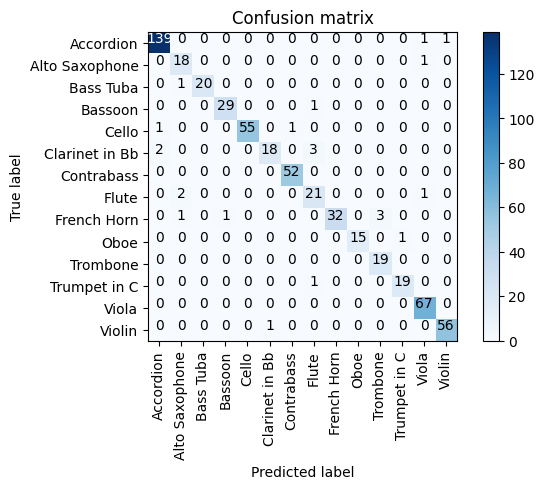

ACC =  0.961
precision =  0.961
recall =  0.961


In [19]:
y_pred_instr = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

##Pitch Classification

# SVM Model

In [20]:
# Create a model for Pitch Classification
svm_pitch = SVC(kernel='poly', C=1, gamma=0.1, random_state=23)
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  svm_pitch.fit(X_train_kfold, y_train_kfold_pitch)
  # TODO:　Evaluate your model  using the validation subset
  score = accuracy_score(y_val_kfold_pitch, svm_pitch.predict(X_val_kfold))
  print("Validation score:", np.round(score, 5))

# TODO: Evaluate the model on the instrument label using the test set
test_score=svm_pitch.score(X_test, y_test_pitch)
print("Test score:", test_score)

Validation score: 0.55784
Validation score: 0.56812
Validation score: 0.58505
Validation score: 0.57732
Validation score: 0.55412
Validation score: 0.58763
Test score: 0.5694682675814752


Confusion matrix


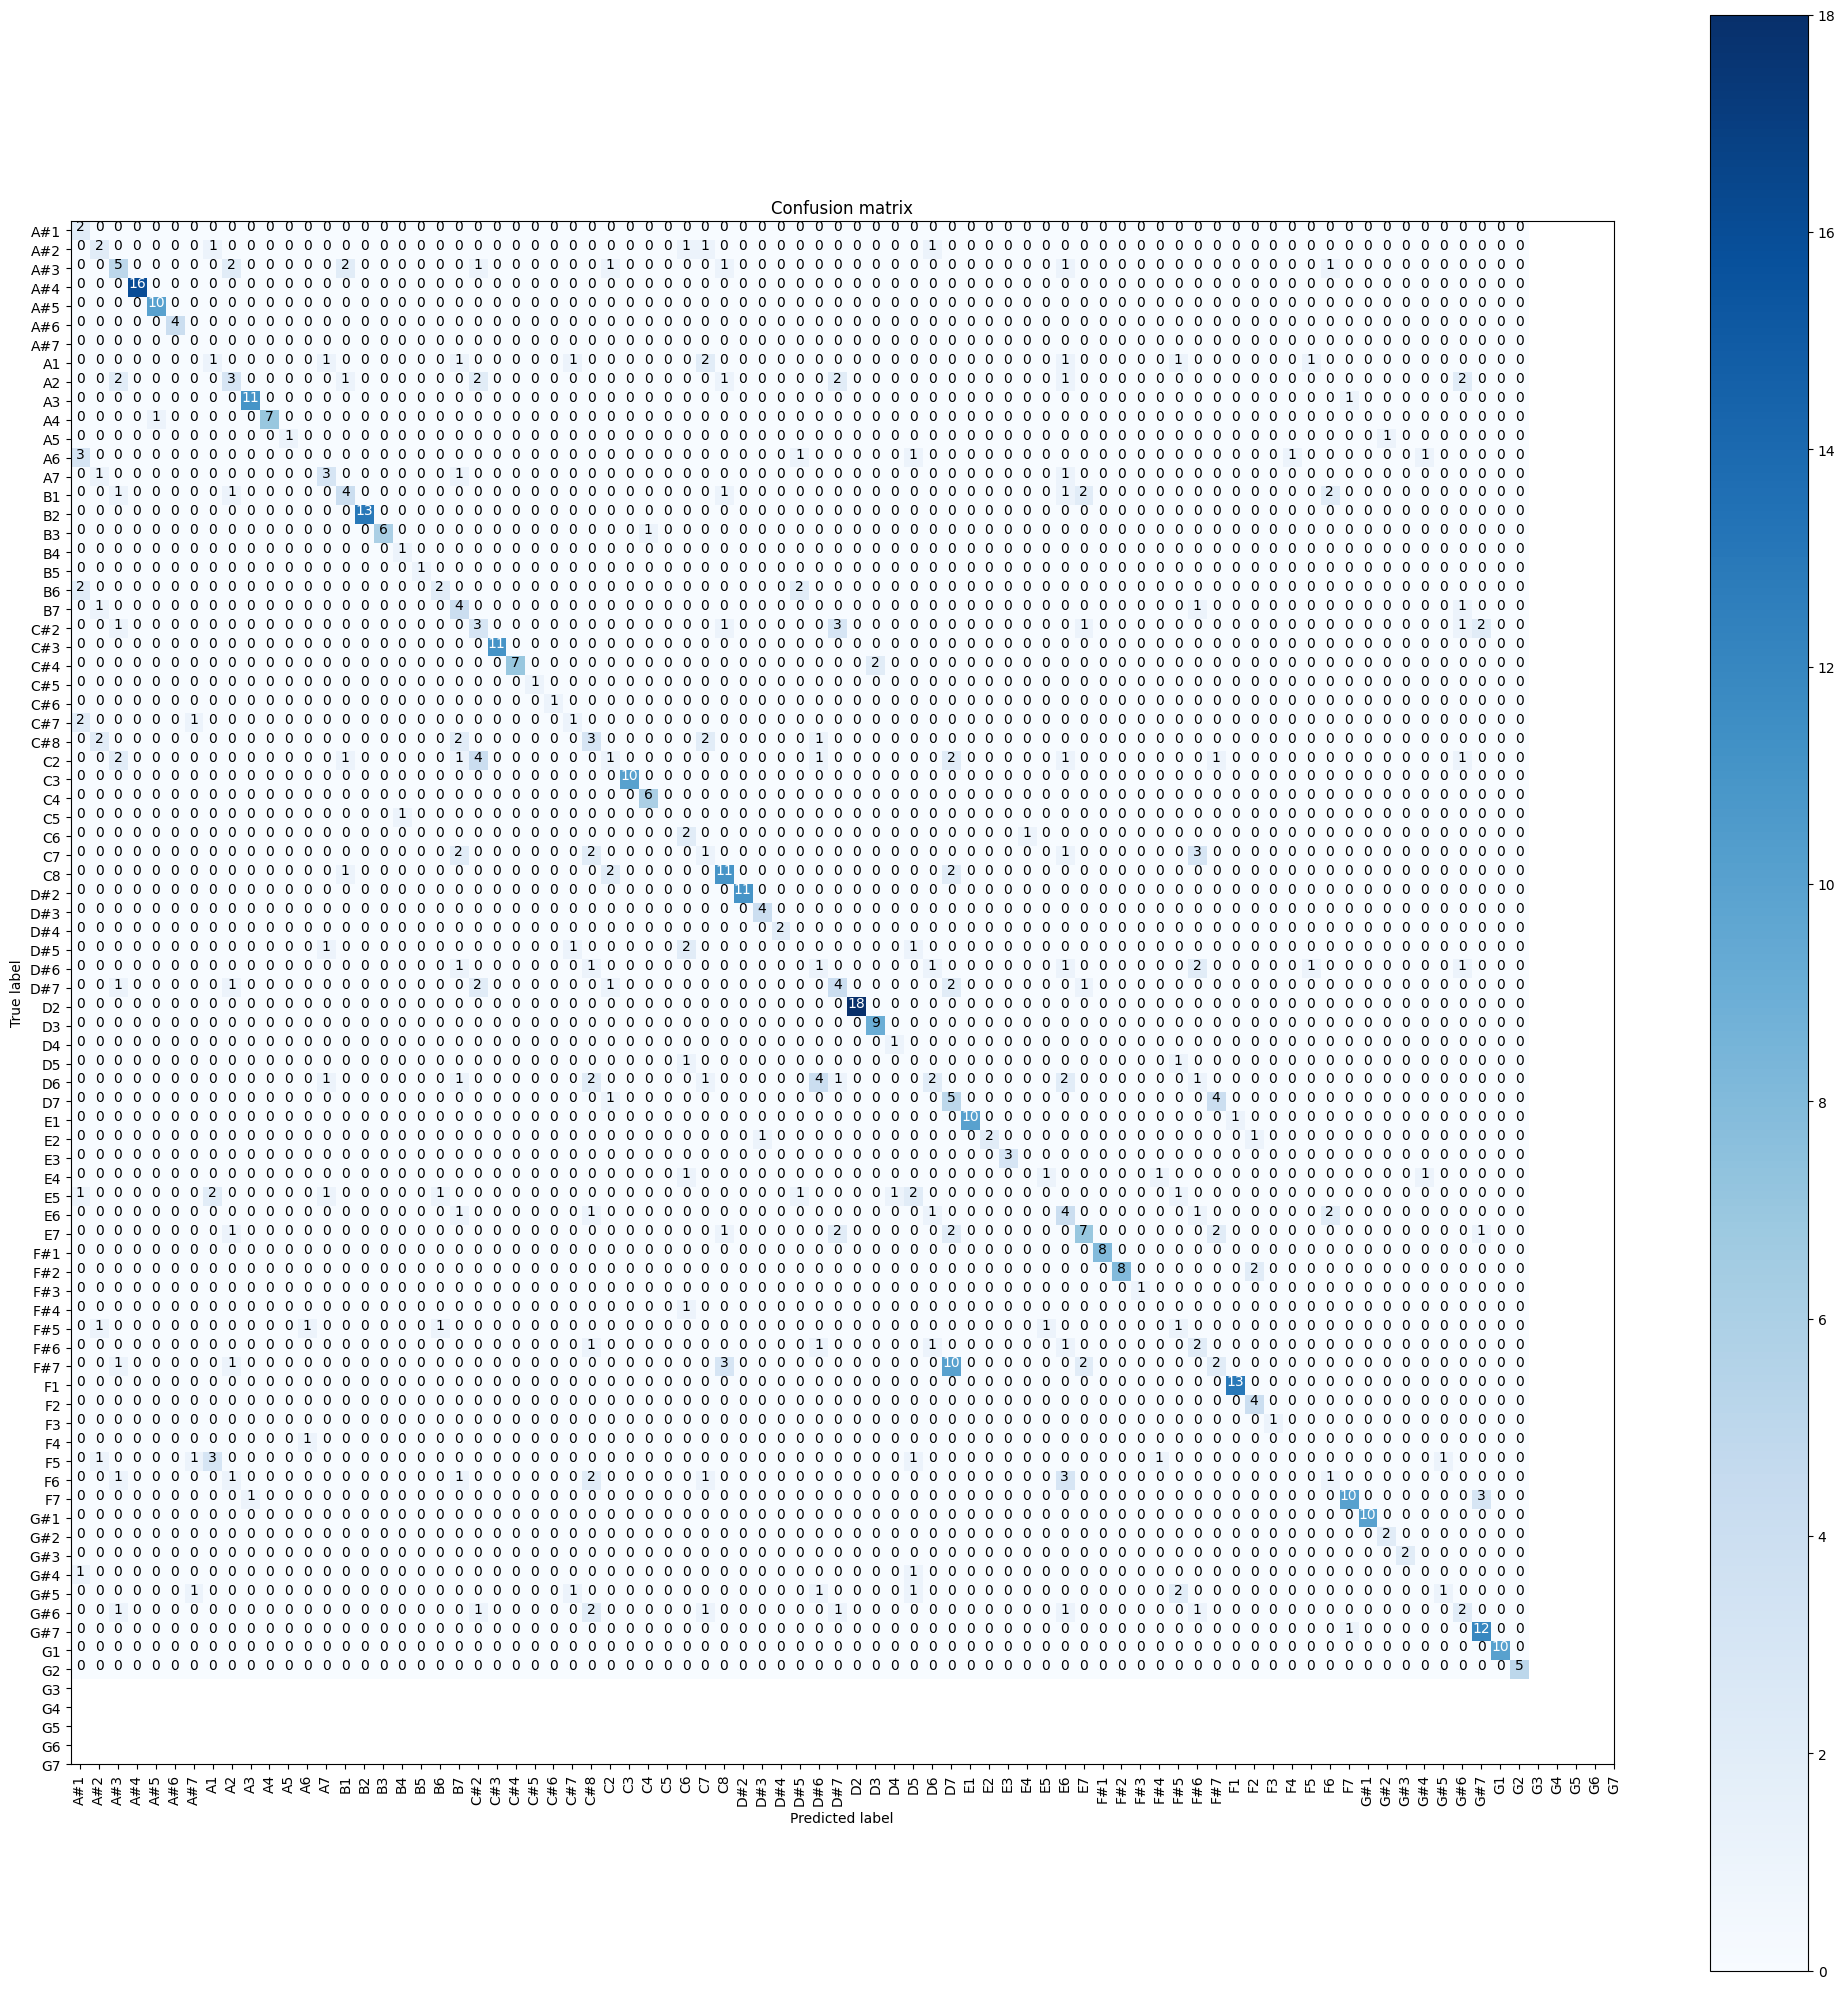

ACC =  0.569
precision =  0.569
recall =  0.569


In [21]:
y_pred_pitch = svm_pitch.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')
cfmtr = confusion_matrix(y_test_pitch, y_pred_pitch)
labels= pitch_classes
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cfmtr , pitch_classes)


print('ACC = ',  np.round(accuracy,3))
print('precision = ', np.round(precision, 3))
print('recall = ', np.round(recall, 3))



#Decision Tree Classifier

In [22]:
# Create a model for Pitch Classification
pitch_tree_model = DecisionTreeClassifier(max_depth=30, random_state=23)
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  pitch_tree_model.fit(X_train_kfold, y_train_kfold_pitch)

  # TODO:　Evaluate your model  using the validation subset
  score = accuracy_score(y_val_kfold_pitch, pitch_tree_model.predict(X_val_kfold))
  print("Validation score:", np.round(score, 5))

Validation score: 0.39075
Validation score: 0.39846
Validation score: 0.41237
Validation score: 0.42268
Validation score: 0.39691
Validation score: 0.44072


Confusion matrix


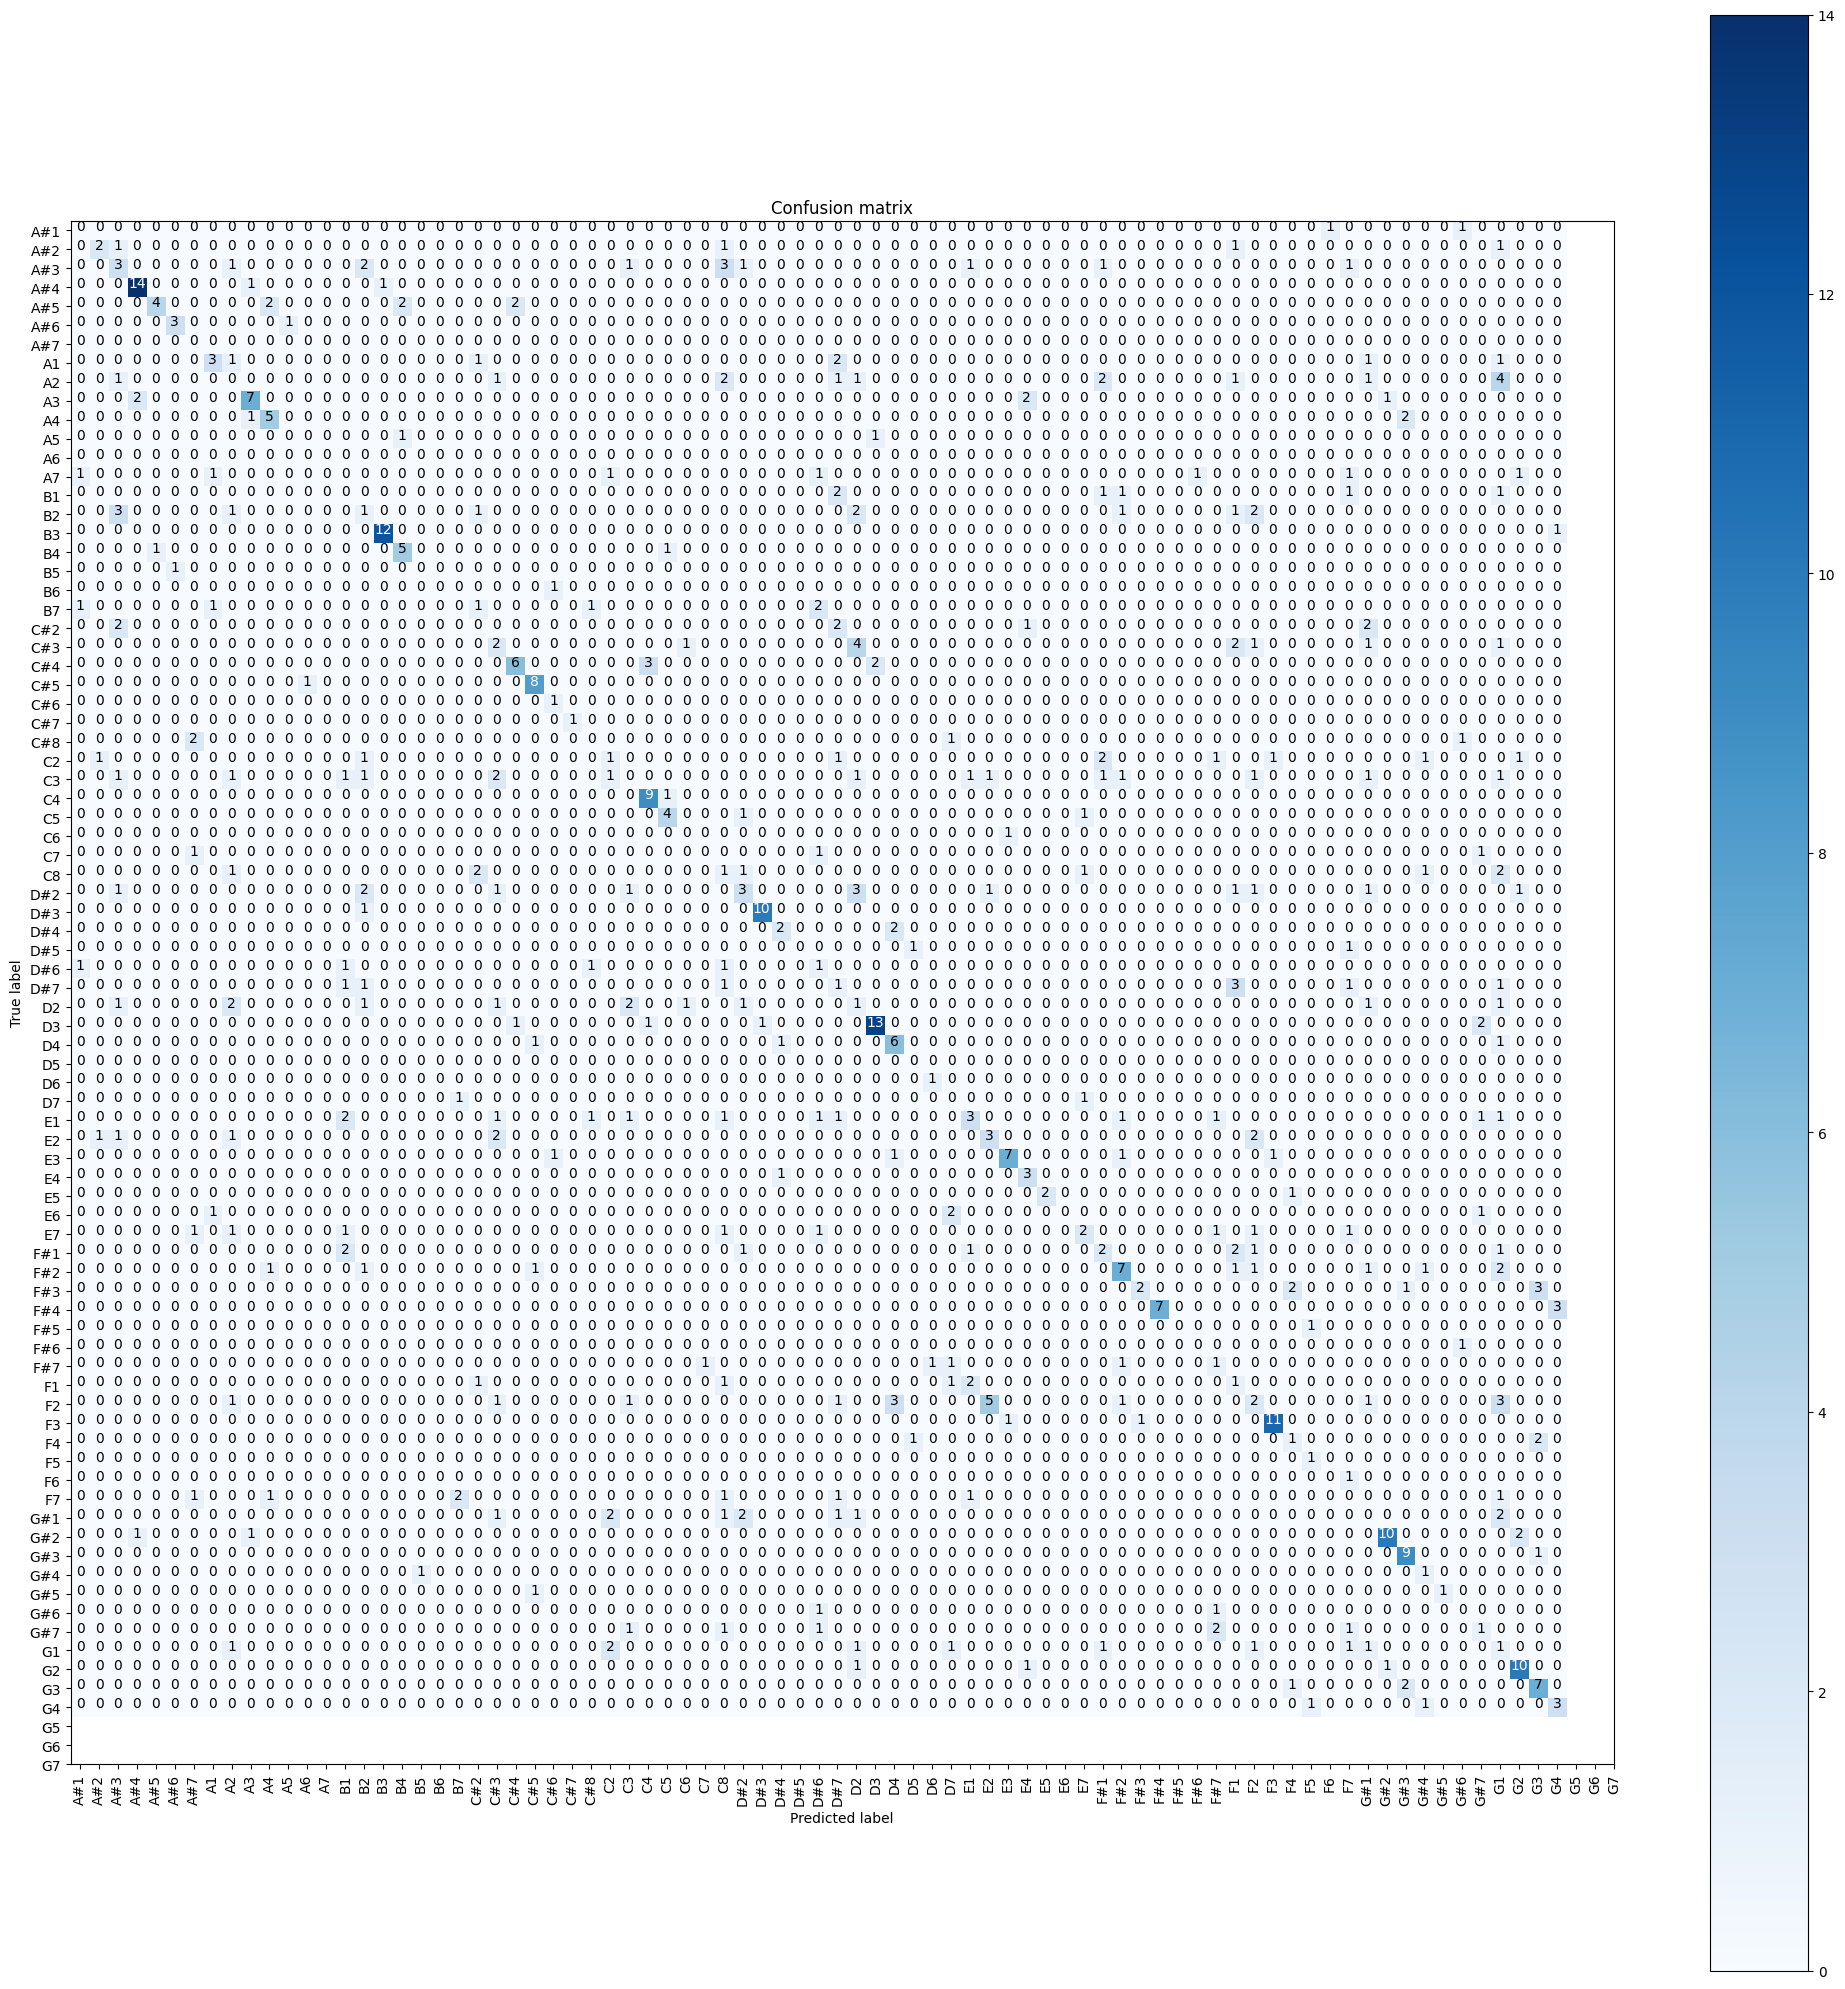

ACC =  0.391
precision =  0.391
recall =  0.391


In [23]:
# TODO: Evaluate the model on the instrument label using the test set
y_pred_pitch = pitch_tree_model.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch,average='micro')
cfmtr = confusion_matrix(y_test_pitch, y_pred_pitch)
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cfmtr , pitch_classes)
print('ACC = ',  np.round(accuracy,3))
print('precision = ', np.round(precision, 3))
print('recall = ', np.round(recall, 3))


#MLP Model

In [24]:
# Create a model for Pitch Classification
pitch_mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=18)
# Perform K-fold cross-validation 
kfold = KFold(n_splits=6)
for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
  pitch_mlp_model.fit(X_train_kfold, y_train_kfold_pitch)

  # TODO:　Evaluate your model  using the validation subset
  score = accuracy_score(y_val_kfold_pitch, pitch_mlp_model.predict(X_val_kfold))
  print("Validation score:", np.round(score, 5))

Validation score: 0.52442
Validation score: 0.52442
Validation score: 0.51031
Validation score: 0.54124
Validation score: 0.48196
Validation score: 0.56959


Confusion matrix


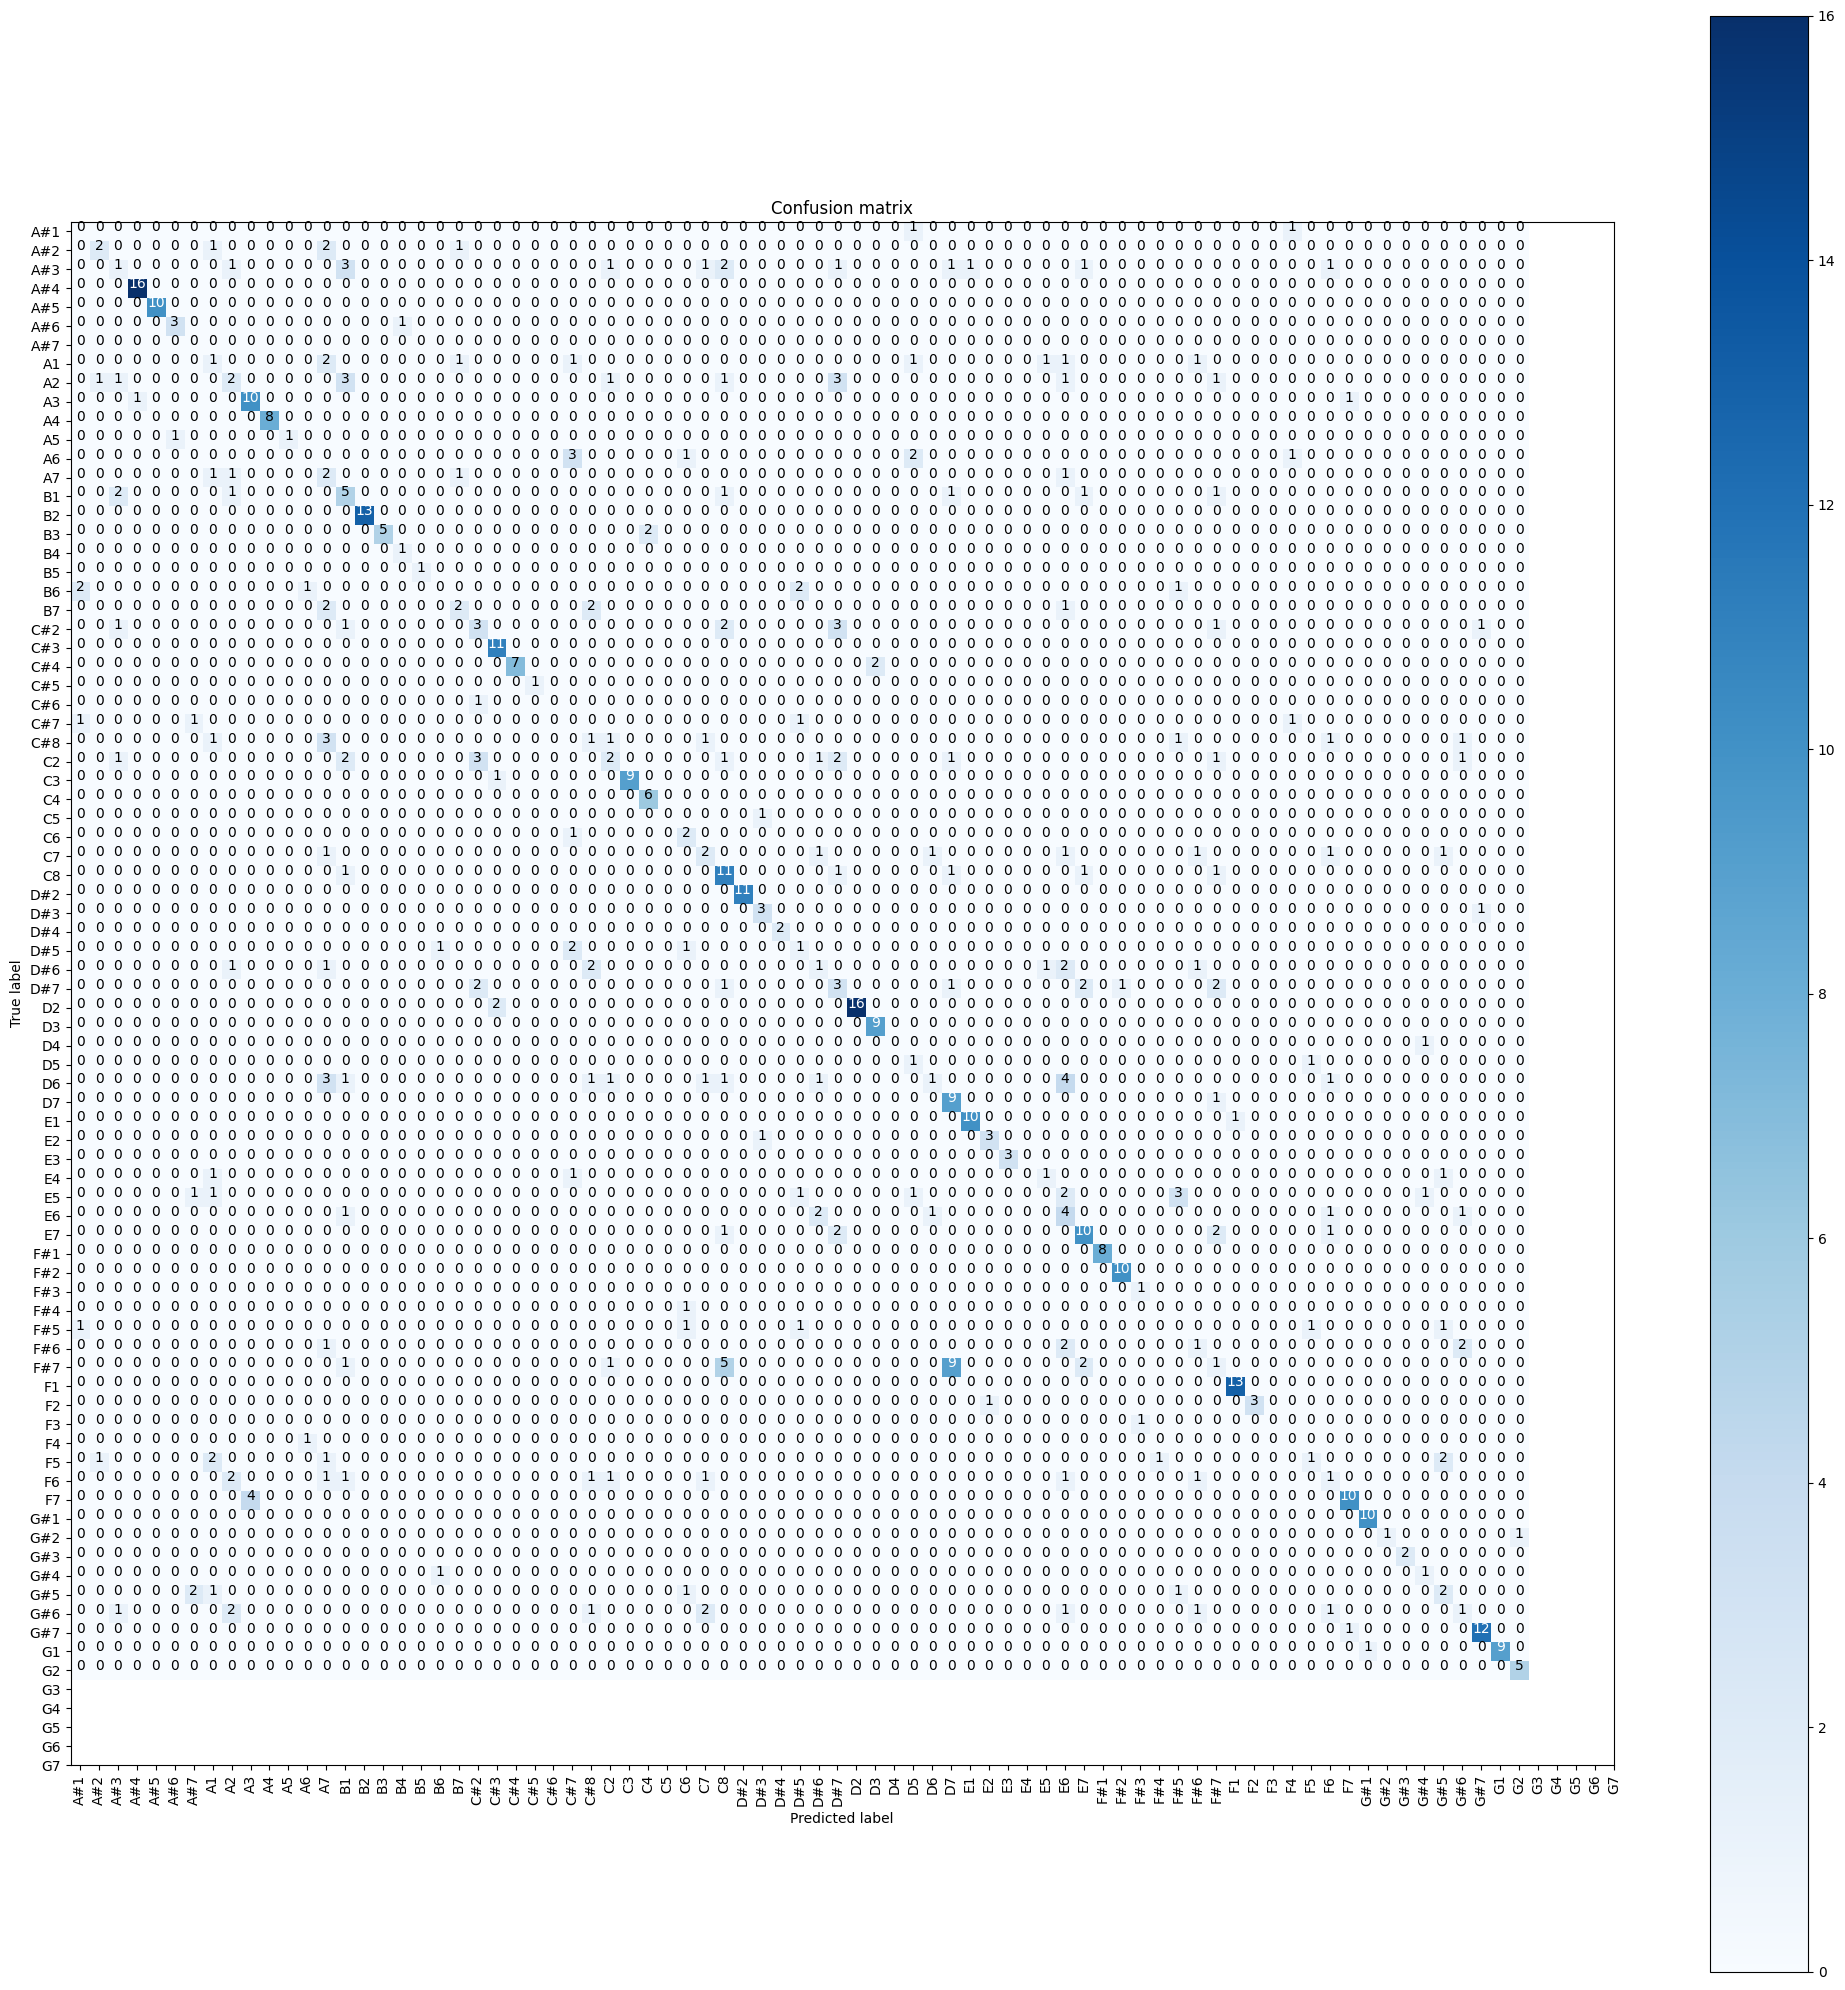

ACC =  0.544
precision =  0.544
recall =  0.544


In [25]:
# TODO: Evaluate the model on the instrument label using the test set
y_pred_pitch = pitch_mlp_model.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch,average='micro')
cfmtr = confusion_matrix(y_test_pitch, y_pred_pitch)
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cfmtr , pitch_classes)
print('ACC = ',  np.round(accuracy,3))
print('precision = ', np.round(precision, 3))
print('recall = ', np.round(recall, 3))

#Bonus


SVM for instrument classification

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1, 2, 3, 5, 7, 8, 10],
              'gamma': [10,1,0.1, 0.01, 0.001, 0.0001]}

svc = SVC(kernel='poly')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train_instrument)

    
print("Score: %s with %0.2f" % (clf.best_params_, clf.best_score_))

Score: {'C': 1, 'gamma': 10} with 0.96


SVM for pitch classification


In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1, 2, 3, 5, 7, 8, 10],
              'gamma': [1,0.1, 0.01, 0.001, 0.0001]}

svc = SVC(kernel='poly')
clf = GridSearchCV(svc, parameters, cv=2 )
clf.fit(X_train, y_train_pitch)

    
print("Score: %s with %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 1, 'gamma': 1} with a score of 0.511


Decision Tree Classifier Grid Search for instrument classification

In [28]:
parameters = { 'criterion': ['gini', 'entropy','MSE','MAE'],'max_depth': [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20 ,23, 25 ,30]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X_train, y_train_instrument)

    
print("Score: %s with %0.2f" % (clf.best_params_, clf.best_score_))

Score: {'criterion': 'entropy', 'max_depth': 16} with 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

Decision Tree Classifier Grid Search for Pitch Classification

In [29]:
parameters = { 'criterion': ['gini', 'entropy','MSE','MAE'],'max_depth': [5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20 ,23, 25 ,30]}

dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters, cv=2)
clf.fit(X_train, y_train_pitch)


    
print("Score: %s with %0.2f" % (clf.best_params_, clf.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
56 fits failed out of a total of 112.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

Score: {'criterion': 'entropy', 'max_depth': 18} with 0.38


MLP Classifier Grid Search for Instrument Classification

In [30]:
parameters = {'hidden_layer_sizes' : [(20,), (10, 10), (20, 20),(45,45), (50,50) ,(20, 20, 20)],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10]}
mlp = MLPClassifier(max_iter=10000, random_state=23)
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train_instrument)



print("Score: %s with %0.2f" % (clf.best_params_, clf.best_score_))

Score: {'alpha': 0.1, 'hidden_layer_sizes': (50, 50)} with 0.95


MLP Classifier Grid Search for Pitch Classification

In [31]:
parameters = {'hidden_layer_sizes' : [(20, 20), (25, 25), (10, 10, 10), (20, 20, 20), (25, 25, 25)],
              'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10]}
mlp = MLPClassifier(max_iter=10000, random_state=23)
clf = GridSearchCV(mlp, parameters, cv=2)
clf.fit(X_train, y_train_instrument)


print("Score: %s with %0.2f" % (clf.best_params_, clf.best_score_))

Score: {'alpha': 1, 'hidden_layer_sizes': (25, 25)} with 0.92



The results from the grid search demonstrate that the selection of hyperparameters can considerably influence the models' performance. Here are the key findings:

In the case of the SVM model, enhancing the value of C can enhance performance. However, excessively high values can lead to overfitting. Likewise, increasing the value of gamma can improve performance, but excessively high values can also result in overfitting.

For the decision tree model, augmenting the maximum depth can lead to improved performance on the training set. Nevertheless, excessively deep trees can result in overfitting. The choice of criterion doesn't seem to exert a significant impact on the model's performance.

With regards to the MLP model, increasing the size of the hidden layers can enhance performance. Nonetheless, an excessive number of neurons can lead to overfitting. Raising the strength of the L2 regularization term can enhance generalization performance and avert overfitting.

In conclusion, it is crucial to meticulously fine-tune hyperparameters in order to achieve optimal performance while avoiding overfitting. It is also important to strike a balance between the model's complexity and its capacity to generalize to new data.